In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, fftfreq, rfftfreq
from scipy.signal.windows import hann

import sys
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src")

from nanonets_utils import fft

In [2]:
# Time Scale
step_size   = 1e-10
amplitude   = 0.2
freq1       = 2e8
freq2       = 7e8
N_voltages  = 2000
time        = step_size*np.arange(N_voltages)

# Voltages
voltages    = np.zeros(shape=(N_voltages,4))

# Input Electrode
voltages[:,0] = amplitude*np.cos(freq1*time)
voltages[:,1] = amplitude*np.cos(freq2*time)

(0.0, 10.0)

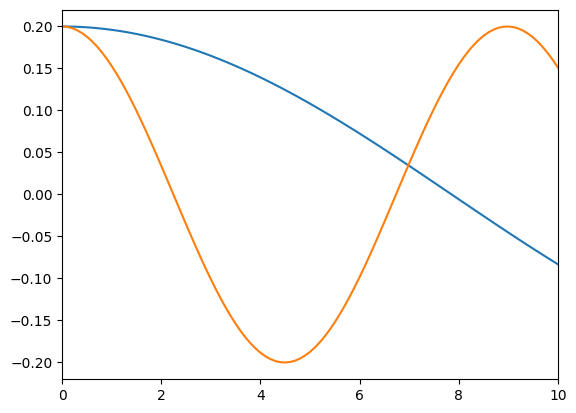

In [3]:
plt.plot(time*1e9, voltages[:,0])
plt.plot(time*1e9, voltages[:,1])
plt.xlim(0,10)

In [4]:
xf1, yf1 = fft(voltages[:,0],step_size)
xf2, yf2 = fft(voltages[:,1],step_size)

(0.0, 1.0)

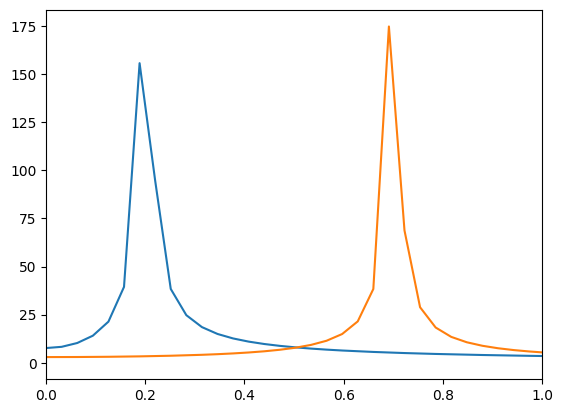

In [6]:
plt.plot(xf1, yf1)
plt.plot(xf2, yf2)
plt.xlim(0,1)